In [8]:
#All of the code are copied from the book
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)
print(X_iris[0], y_iris[0])

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
 # Get dataset with only the first two attributes
x = X_iris[:, :2]
y = y_iris
# Split the dataset into a training and a testing set
    # Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# print(X_train.shape, y_train.shape(112, 2) (112,))
#    # Standardize the features
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

(112, 2) (112,)


Text(0, 0.5, 'Sepal width')

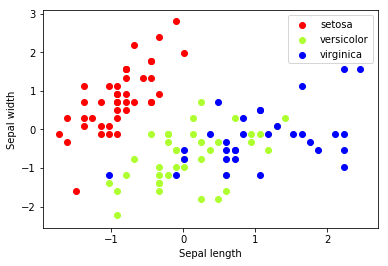

In [16]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [18]:

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
print(clf.coef_)

[[-27.07165569  13.75308957]
 [ -2.98134261 -10.79051511]
 [ 17.26250611   0.54193435]]


In [20]:
print(clf.intercept_)

[-18.35967396  -2.09940172   2.28966934]


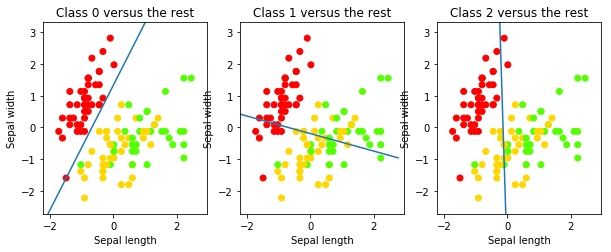

In [55]:
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
#error in case Xs or xs
Xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - Xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)

In [56]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )


[0]


In [57]:
print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )

[[ 16.89908097   0.7439393  -19.4066956 ]]


In [58]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )

0.8214285714285714


In [59]:
y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

0.6842105263157895


In [60]:
print( metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.40      0.18      0.25        11
   virginica       0.64      0.84      0.73        19

   micro avg       0.68      0.68      0.68        38
   macro avg       0.68      0.67      0.66        38
weighted avg       0.65      0.68      0.65        38



In [61]:
print( metrics.confusion_matrix(y_test, y_pred) )

[[ 8  0  0]
 [ 0  2  9]
 [ 0  3 16]]


In [63]:
print("My name is Zhuoyuan Zhang")
print("My NetID is: zz10")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Matthew Murphy
My NetID is: mdmurph
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
